# The Iris flower data set
The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

## Problem  :
Design a machine learning model to classify iris flowers into three species (Setosa, Versicolor, and Virginica) based on four features: sepal length, sepal width, petal length, and petal width. Overcome challenges such as multiclass classification, varying feature importance, data balance, and generalization. Develop a model that provides accurate predictions, effectively handles feature variability, and ensures fair representation of all species.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### importing csv file

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

## Graphical Representation

### Histogram
shows the frequency of numerical data using rectangles

<AxesSubplot: xlabel='PetalWidthCm', ylabel='Count'>

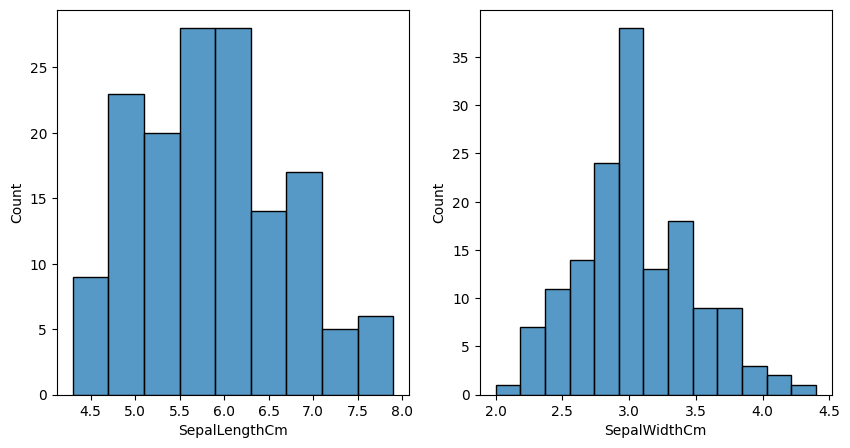

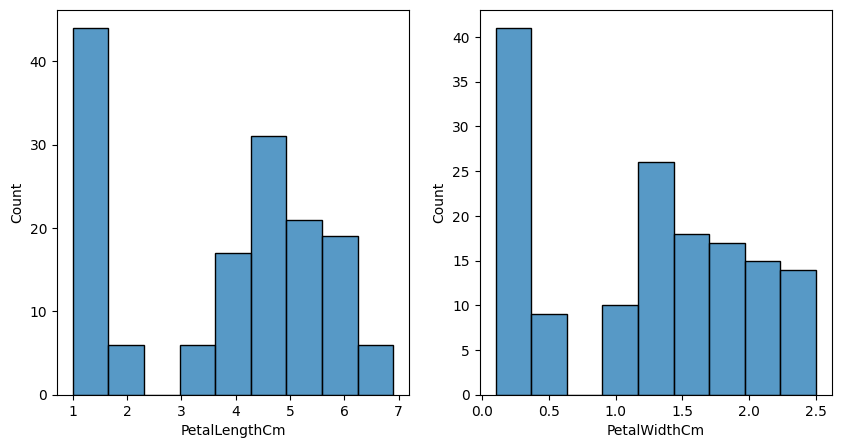

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(data=df, x="SepalLengthCm",ax=ax[0])
sns.histplot(data=df, x="SepalWidthCm",ax=ax[1])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(data=df, x="PetalLengthCm",ax=ax[0])
sns.histplot(data=df, x="PetalWidthCm",ax=ax[1])



### FacetGrid
FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

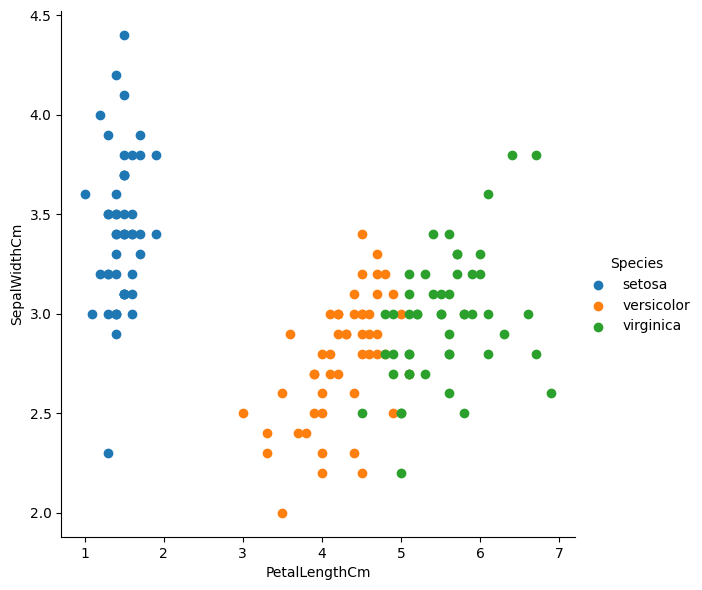

In [8]:
sns.FacetGrid(df, hue="Species", height=6).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend()

In [ ]:
Plot pairwise relationships in a dataset.

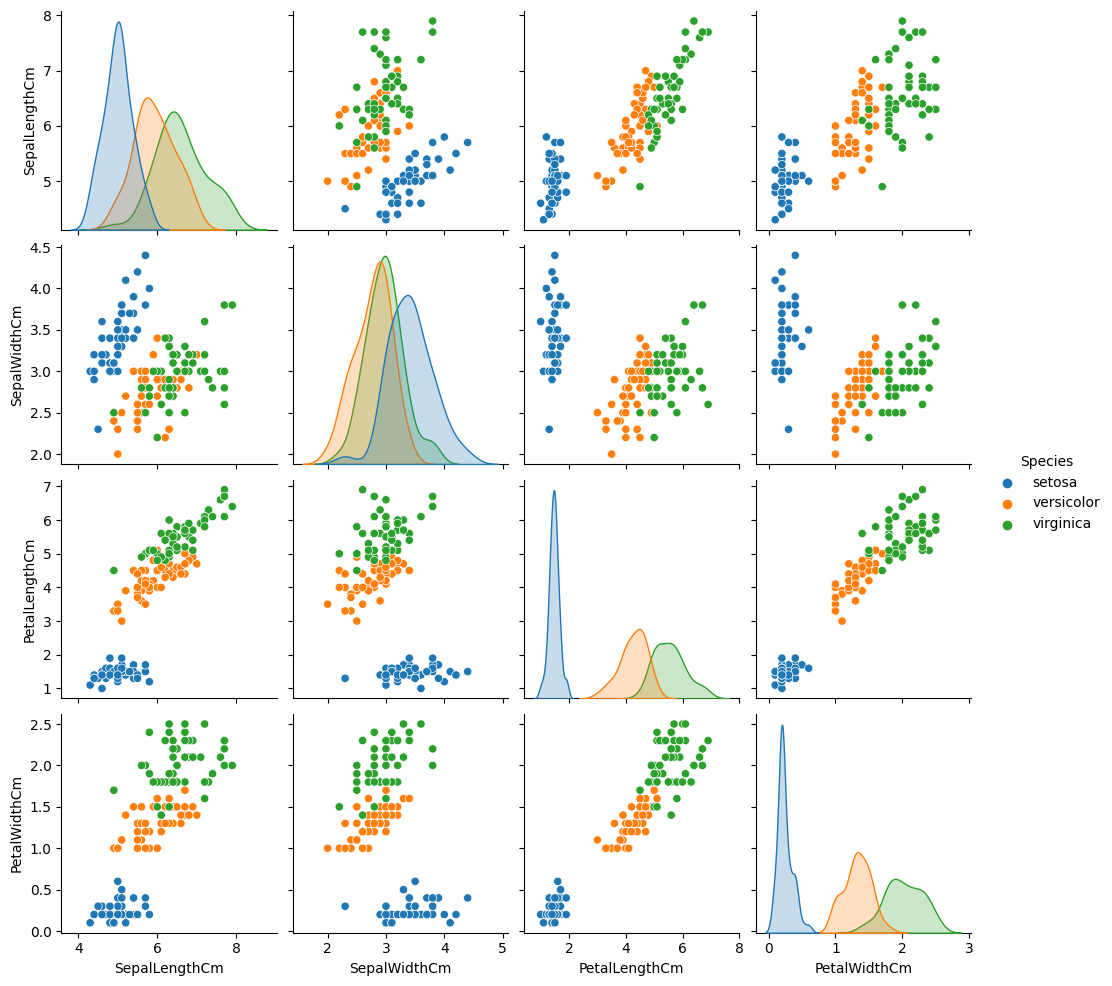

In [46]:
sns.pairplot(df.drop("Id", axis=1), hue="Species")

## Boxplot

<AxesSubplot: xlabel='Species', ylabel='SepalWidthCm'>

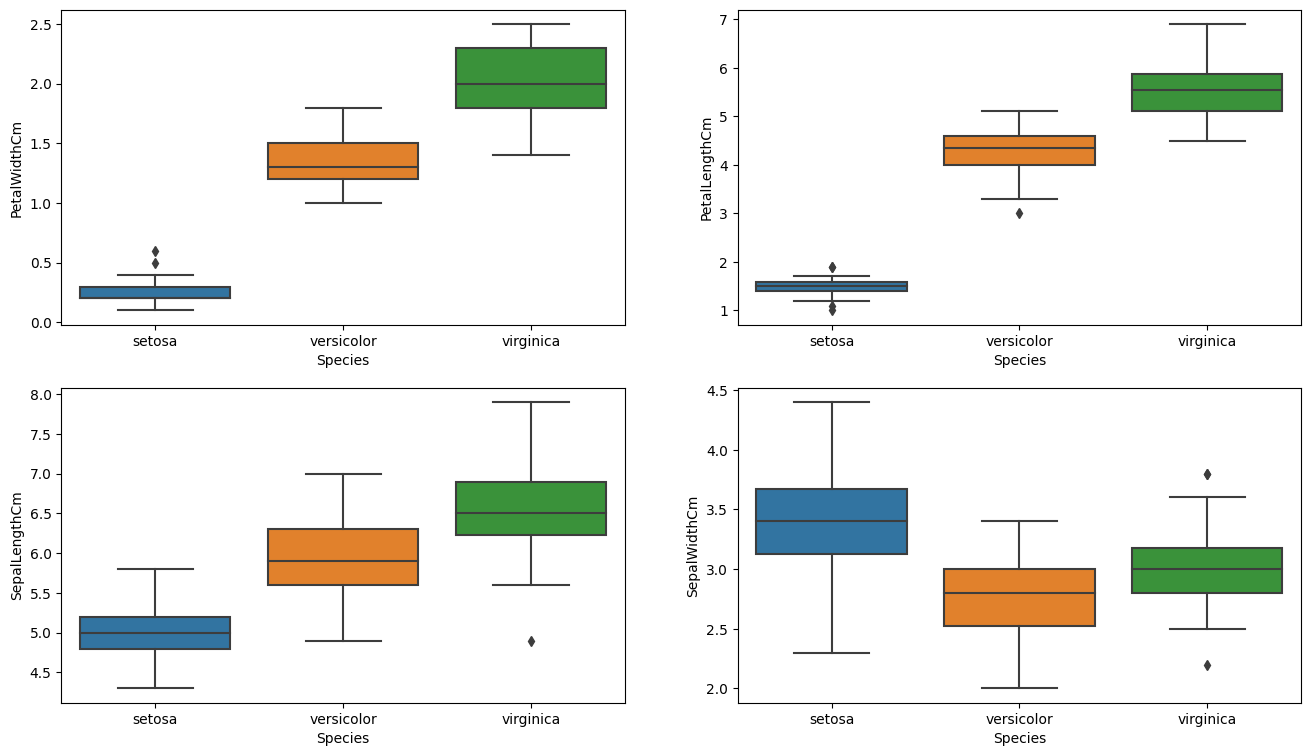

In [25]:
fig, axes = plt.subplots(2,2, figsize=(16,9))

sns.boxplot(x='Species', y='PetalWidthCm', data=df, orient='v', ax=axes[0,0])
sns.boxplot(x='Species', y='PetalLengthCm', data=df, orient='v', ax=axes[0,1])
sns.boxplot(x='Species', y='SepalLengthCm', data=df, orient='v', ax=axes[1,0])
sns.boxplot(x='Species', y='SepalWidthCm', data=df, orient='v', ax=axes[1,1])

### heatmap

<AxesSubplot: >

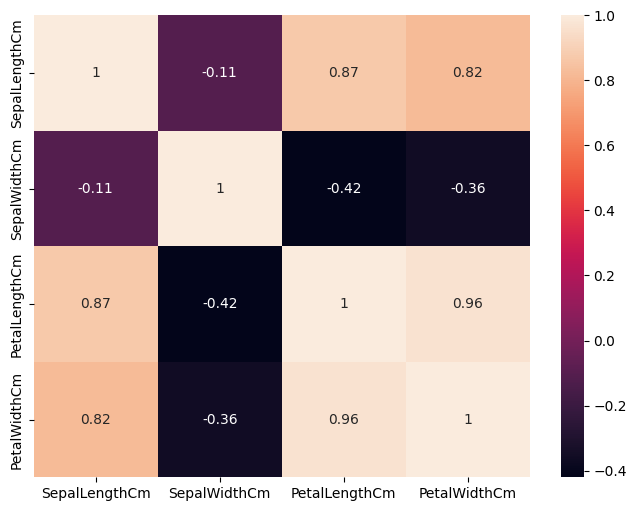

In [44]:
plt.figure(figsize=(8,6))
iris_corr = df.drop('Id',axis=1).corr()
sns.heatmap(iris_corr, annot=True)

## Building Model
Lets build the **Logestic Regression model**
Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
X= df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=df[['Species']]

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X,y)

LogisticRegression()

In [18]:
model.score(X,y)*100

97.33333333333334

In [19]:
expected =y
predicted = model.predict(X)
predicted


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

In [20]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [21]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
